In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/Pokeman-Doraemon/data_ready"

In [ ]:
import os
labels = os.listdir(path)
labels

['Doraemon', 'Pokemon']

Label: Doraemon


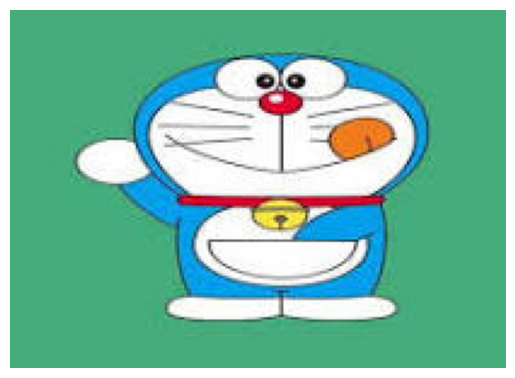

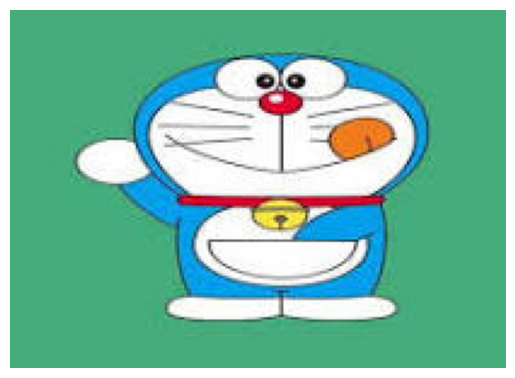

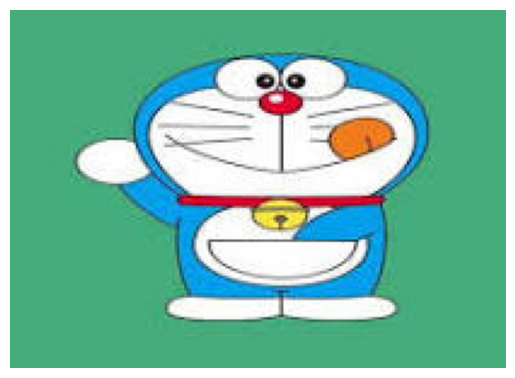

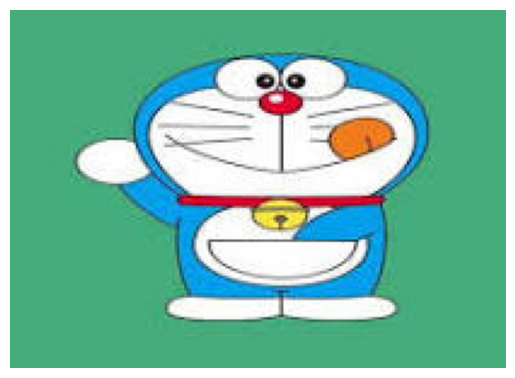

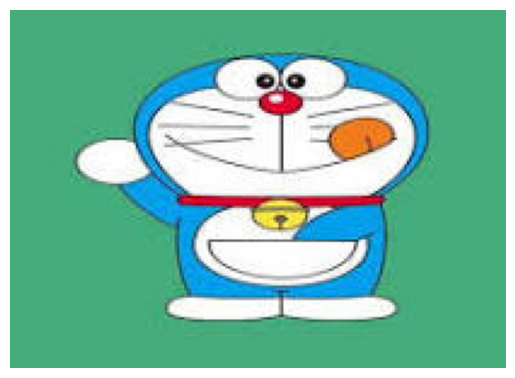

--------------------
Label: Pokemon


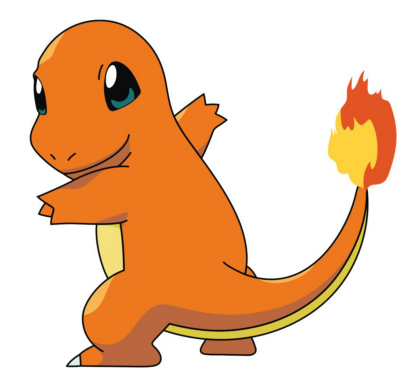

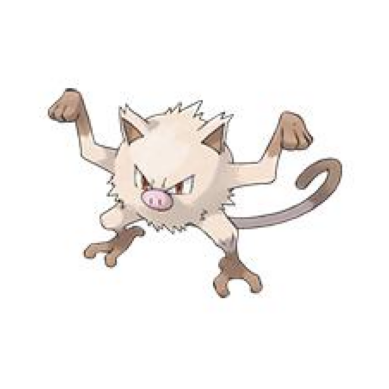

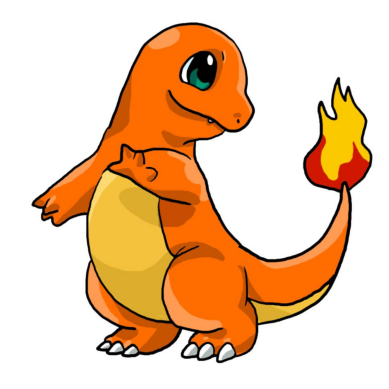

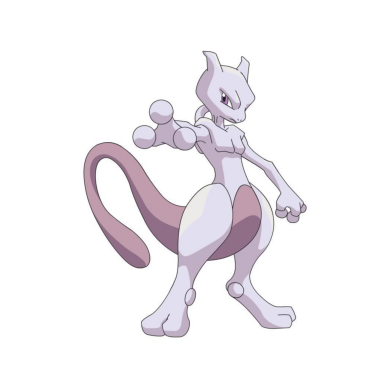

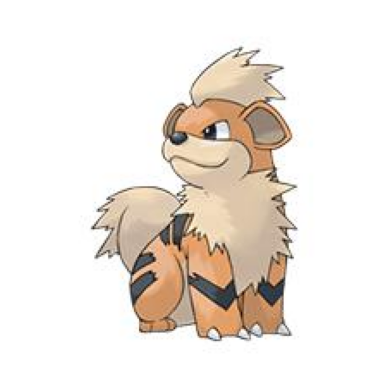

--------------------


In [ ]:
import matplotlib.pyplot as plt
import cv2
for label in labels:
  print(f"Label: {label}")
  image_count = 0
  for image_name in os.listdir(os.path.join(path, label)):
      if image_count >=5:
          break
      image_path = os.path.join(path, label, image_name)
      try:
          img = cv2.imread(image_path)
          img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert from BGR to RGB
          plt.imshow(img)
          plt.axis('off')
          plt.show()
          image_count += 1
      except Exception as e:
          print(f"Error loading image {image_path}: {e}")
  print("-" * 20)

Label: Doraemon


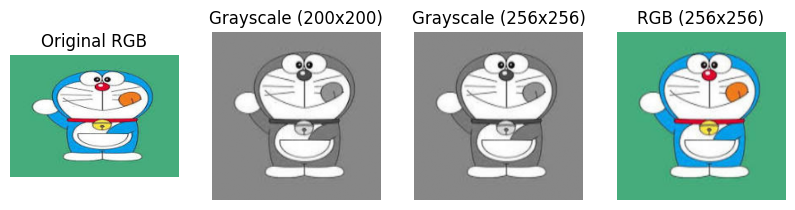

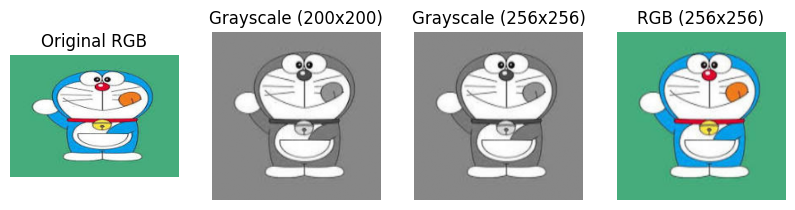

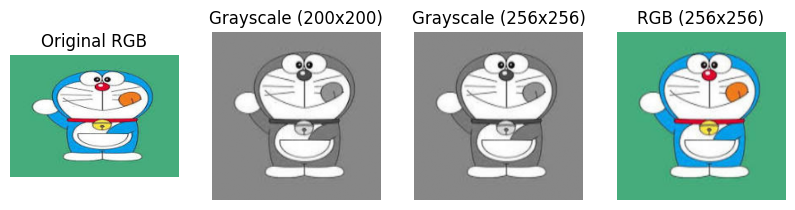

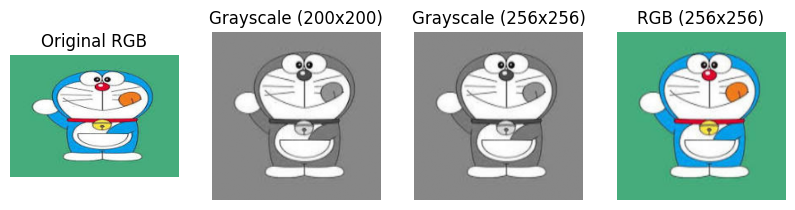

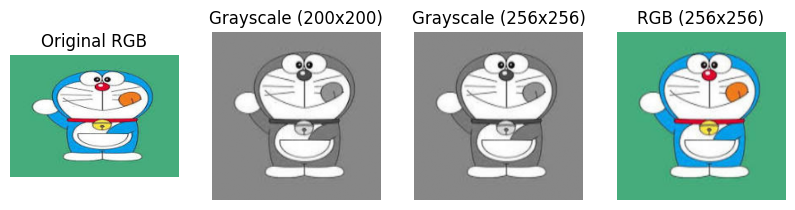

--------------------
Label: Pokemon


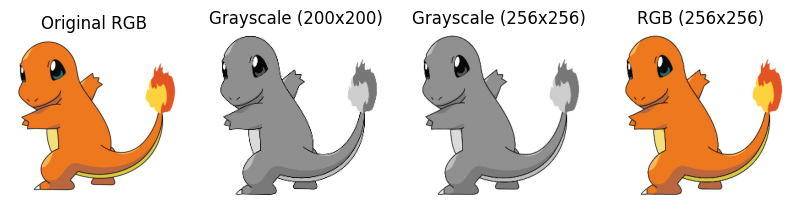

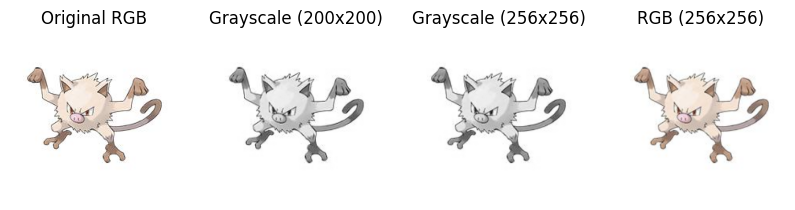

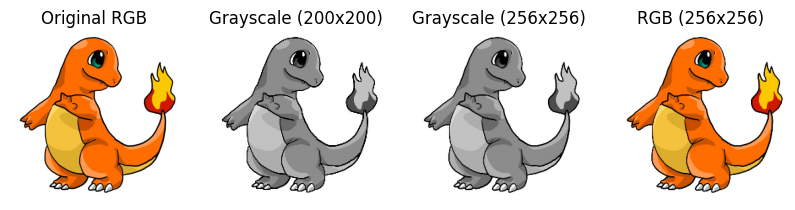

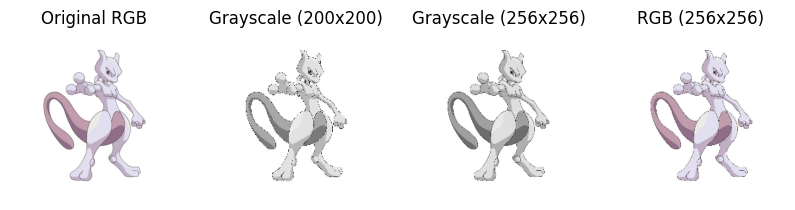

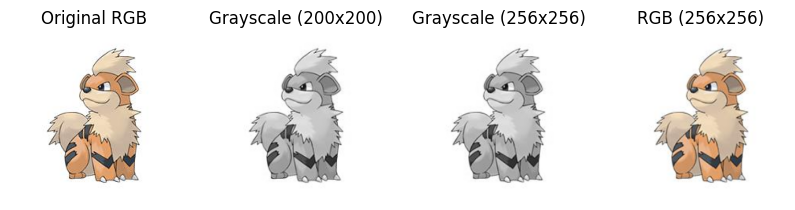

--------------------


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


for label in labels:
  print(f"Label: {label}")
  image_count = 0
  for image_name in os.listdir(os.path.join(path, label)):
      if image_count >= 5:
          break
      image_path = os.path.join(path, label, image_name)
      try:
          img = cv2.imread(image_path)
          img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

          # Grayscale conversion
          gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

          # Resize images
          gray_img_200 = cv2.resize(gray_img, (200, 200))
          gray_img_256 = cv2.resize(gray_img, (256, 256))
          img_200 = cv2.resize(img, (200, 200))
          img_256 = cv2.resize(img, (256,256))

          # Display images
          plt.figure(figsize=(10, 5))

          plt.subplot(1, 4, 1)
          plt.imshow(img)
          plt.title('Original RGB')
          plt.axis('off')

          plt.subplot(1, 4, 2)
          plt.imshow(gray_img_200, cmap='gray')
          plt.title('Grayscale (200x200)')
          plt.axis('off')

          plt.subplot(1, 4, 3)
          plt.imshow(gray_img_256, cmap='gray')
          plt.title('Grayscale (256x256)')
          plt.axis('off')

          plt.subplot(1,4,4)
          plt.imshow(img_256)
          plt.title('RGB (256x256)')
          plt.axis('off')

          plt.show()

          image_count += 1
      except Exception as e:
          print(f"Error loading image {image_path}: {e}")
  print("-" * 20)


In [ ]:
import os
import random
from shutil import copyfile

def split_dataset(source_dir, train_dir, val_dir, test_dir, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):

    if train_ratio + val_ratio + test_ratio != 1.0:
        raise ValueError("Ratios must sum to 1.0")

    for label in os.listdir(source_dir):
        label_source = os.path.join(source_dir, label)
        label_train = os.path.join(train_dir, label)
        label_val = os.path.join(val_dir, label)
        label_test = os.path.join(test_dir, label)

        os.makedirs(label_train, exist_ok=True)
        os.makedirs(label_val, exist_ok=True)
        os.makedirs(label_test, exist_ok=True)

        images = [f for f in os.listdir(label_source) if os.path.isfile(os.path.join(label_source, f))]
        random.shuffle(images)
        num_images = len(images)

        num_train = int(num_images * train_ratio)
        num_val = int(num_images * val_ratio)
        num_test = num_images - num_train - num_val  # Ensure all images are used

        for i, image in enumerate(images):
            source_path = os.path.join(label_source, image)
            if i < num_train:
                destination_path = os.path.join(label_train, image)
            elif i < num_train + num_val:
                destination_path = os.path.join(label_val, image)
            else:
                destination_path = os.path.join(label_test, image)
            copyfile(source_path, destination_path)

# Example usage (replace with your actual paths)
source_directory = "/content/drive/MyDrive/Pokeman-Doraemon/data_ready"
train_directory = "/content/drive/MyDrive/Pokeman-Doraemon/train"
val_directory = "/content/drive/MyDrive/Pokeman-Doraeman/val"
test_directory = "/content/drive/MyDrive/Pokeman-Doraeman/test"

split_dataset(source_directory, train_directory, val_directory, test_directory)


In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Pokeman-Doraemon/train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)
validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Pokeman-Doraeman/val',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)
test_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Pokeman-Doraeman/test',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 718 images belonging to 2 classes.
Found 153 images belonging to 2 classes.
Found 156 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Define the CNN model
model = keras.Sequential(
    [
        keras.Input(shape=(256, 256, 3)),  # Input shape
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),  # Dropout for regularization
        layers.Dense(2, activation="softmax"),  # Output layer (2 classes)
    ]
)

In [ ]:
# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7092 - loss: 1.6468

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 104s 4s/step - accuracy: 0.7131 - loss: 1.6175 - val_accuracy: 0.9412 - val_loss: 0.1675
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 90s 4s/step - accuracy: 0.9238 - loss: 0.1948 - val_accuracy: 0.9608 - val_loss: 0.0981
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 0.9554 - loss: 0.1255 - val_accuracy: 0.9739 - val_loss: 0.0677
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 140s 4s/step - accuracy: 0.9856 - loss: 0.0684 - val_accuracy: 0.9739 - val_loss: 0.0577
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 88s 4s/step - accuracy: 0.9668 - loss: 0.0792 - val_accuracy: 0.9869 - val_loss: 0.0501
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 0.9742 - loss: 0.0676 - val_accuracy: 0.9869 - val_loss: 0.0628
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 102s 4s/step - accuracy: 0.9863 - loss: 0.0566 - val_accuracy: 0.9869 - val_loss: 0.0446
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 90s 4s/step - accuracy: 0.9859 - loss: 0.0622 - val_accuracy: 0.9739 - val_loss: 0.0715


In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9667 - loss: 0.0809
Test Loss: 0.0658
Test Accuracy: 0.9679


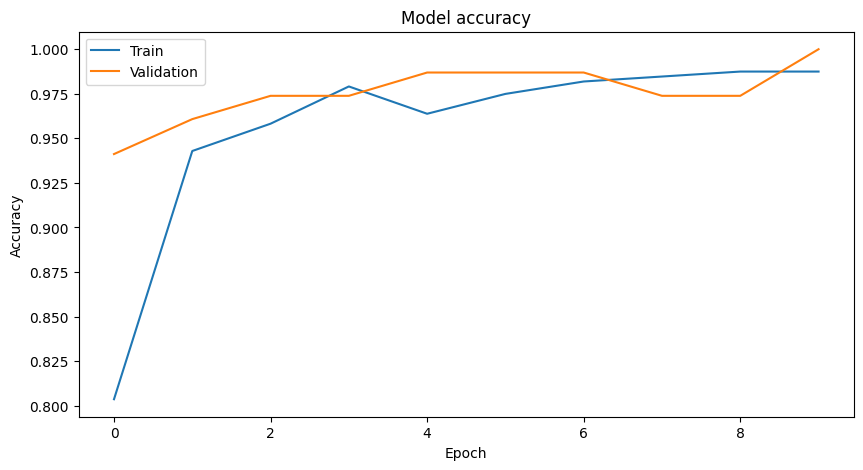

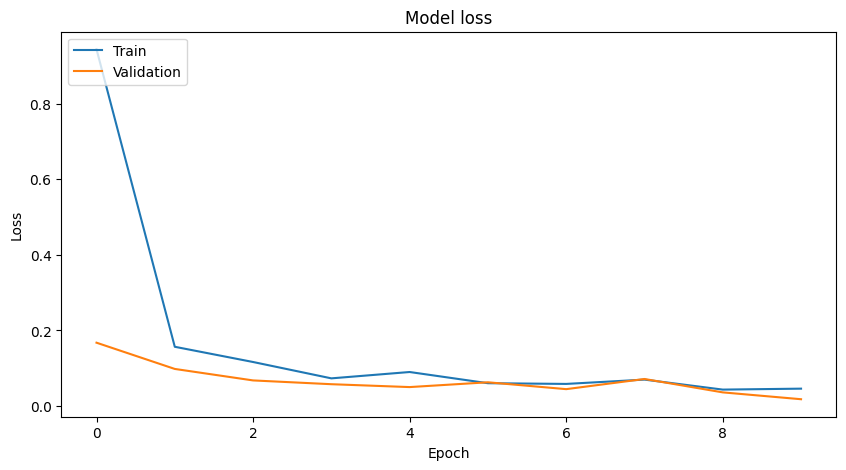

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │       492,034 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,534,280 (5.85 MB)

 Trainable params: 511,426 (1.95 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,022,854 (3.90 MB)

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = test_generator.classes

print(classification_report(y_true, y_pred_classes, target_names=list(test_generator.class_indices.keys())))

5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step
              precision    recall  f1-score   support

    Doraemon       0.99      0.97      0.98        77
     Pokemon       0.97      0.99      0.98        79

    accuracy                           0.98       156
   macro avg       0.98      0.98      0.98       156
weighted avg       0.98      0.98      0.98       156



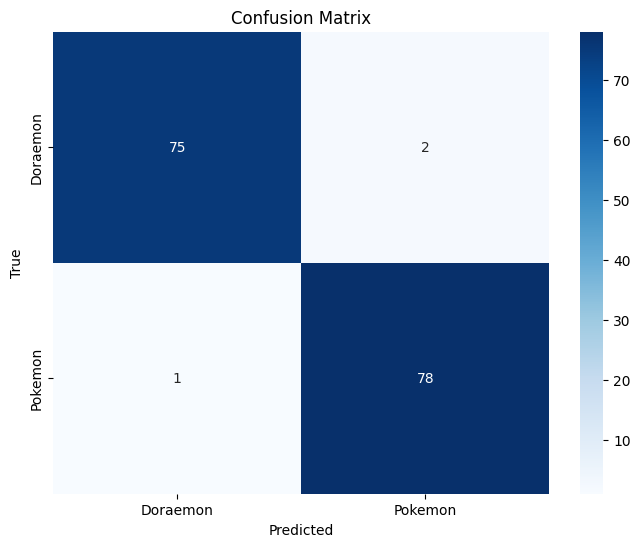

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(test_generator.class_indices.keys()),
            yticklabels=list(test_generator.class_indices.keys()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Saving 26 (1).jpg to 26 (1) (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Predicted rice type for 26 (1) (1).jpg: Doraemon


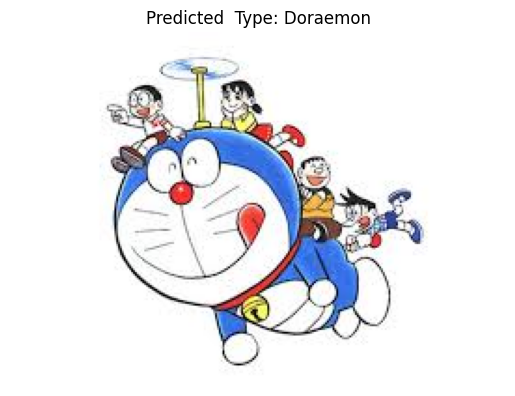

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import cv2
import numpy as np

def predict_rice_type(image_path):
    try:
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (256, 256))
        img = img / 255.0
        img = np.expand_dims(img, axis=0)

        prediction = model.predict(img)
        predicted_class_index = np.argmax(prediction)

        class_labels = list(test_generator.class_indices.keys())

        predicted_label = class_labels[predicted_class_index]
        return predicted_label
    except Exception as e:
        print(f"Error predicting  type: {e}")
        return None


uploaded = files.upload()
for fn in uploaded.keys():
    image_path = fn
    predicted_rice_type = predict_rice_type(image_path)

    if predicted_rice_type:
        print(f"Predicted rice type for {image_path}: {predicted_rice_type}")

        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(f'Predicted  Type: {predicted_rice_type}')
        plt.axis('off')
        plt.show()
    else:
        print(f"Could not predict  type for {image_path}")

Saving Pkmn_img98.JPG to Pkmn_img98 (1).JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted  type for Pkmn_img98 (1).JPG: Pokemon


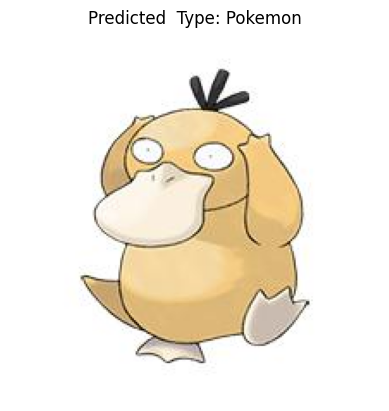

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import cv2
import numpy as np

def predict_rice_type(image_path):
    try:
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (256, 256))
        img = img / 255.0
        img = np.expand_dims(img, axis=0)

        prediction = model.predict(img)
        predicted_class_index = np.argmax(prediction)

        class_labels = list(test_generator.class_indices.keys())

        predicted_label = class_labels[predicted_class_index]
        return predicted_label
    except Exception as e:
        print(f"Error predicting  type: {e}")
        return None


uploaded = files.upload()
for fn in uploaded.keys():
    image_path = fn
    predicted_rice_type = predict_rice_type(image_path)

    if predicted_rice_type:
        print(f"Predicted  type for {image_path}: {predicted_rice_type}")

        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(f'Predicted  Type: {predicted_rice_type}')
        plt.axis('off')
        plt.show()
    else:
        print(f"Could not predict  type for {image_path}")

In [ ]:
from statsmodels.stats.weightstats import ztest

sample_accuracies = [0.82, 0.79, 0.85, 0.81, 0.83]
value = 0.8

z_statistic, p_value = ztest(sample_accuracies, value=value)

print(f"Z-statistic: {z_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The average accuracy is significantly different from 0.8.")
else:
    print("Fail to reject the null hypothesis: There's no significant difference in average accuracy from 0.8.")

Z-statistic: 1.9999999999999933
P-value: 0.0455002638963591
Reject the null hypothesis: The average accuracy is significantly different from 0.8.


In [ ]:
from scipy import stats

sample_accuracies = [0.82, 0.79, 0.85, 0.81, 0.83]
value = 0.8

t_statistic, p_value = stats.ttest_1samp(sample_accuracies, value)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The average accuracy is significantly different from 0.8.")
else:
    print("Fail to reject the null hypothesis: There's no significant difference in average accuracy from 0.8.")


T-statistic: 1.9999999999999933
P-value: 0.11611652351681642
Fail to reject the null hypothesis: There's no significant difference in average accuracy from 0.8.


In [ ]:
observed_frequencies = [10, 15, 20, 25]
expected_frequencies = [14, 17.5, 21, 27.5]


total_observed = sum(observed_frequencies)

expected_frequencies = [(freq / sum(expected_frequencies)) * total_observed for freq in expected_frequencies]

chi2_statistic, p_value = stats.chisquare(observed_frequencies, f_exp=expected_frequencies)

print(f"Chi-square statistic: {chi2_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
  print("Reject the null hypothesis: There's a significant difference between observed and expected frequencies.")
else:
  print("Fail to reject the null hypothesis: No significant difference between observed and expected frequencies.")

Chi-square statistic: 0.5998763141620285
P-value: 0.8964606878074289
Fail to reject the null hypothesis: No significant difference between observed and expected frequencies.


In [ ]:
from statsmodels.stats.weightstats import ztest

group1 = [85, 90, 92, 88, 95]
group2 = [80, 82, 85, 78, 83]

z_statistic, p_value = ztest(group1, group2)

print(f"Z-statistic: {z_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference between the groups.")


Z-statistic: 4.022870397928839
P-value: 5.749313666325864e-05
Reject the null hypothesis: There is a statistically significant difference between the groups.
